In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


Using TensorFlow backend.


In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import sklearn as sk
from PIL import Image
from matplotlib import image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
valid=pd.read_csv('Meta.csv')

In [0]:
x_train=[]
y_train=[]
for i in range(len(train)):
  x_train.append(np.array(Image.open(train['Path'][i]).resize((28,28),Image.NEAREST)))
  y_train.append(train['ClassId'][i])

In [0]:
x_test=[]
y_test=[]
for i in range(len(test)):
  x_test.append(np.array(Image.open(test['Path'][i]).resize((28,28),Image.NEAREST)))
  y_test.append(test['ClassId'][i])

In [6]:
x_validate=[]
y_validate=[]
for i in range(len(valid)):
  x_validate.append(np.array(Image.open(valid['Path'][i]).resize((28,28),Image.NEAREST)))
  y_validate.append(valid['ClassId'][i])
x_validate[1]

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

1

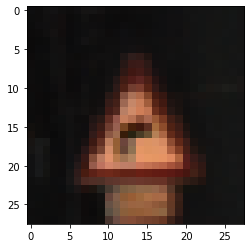

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[i])
i = 2100
y_train[i]

17

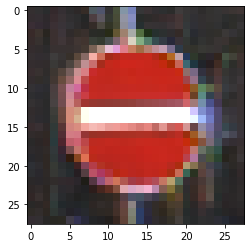

In [8]:
i = 200
plt.imshow(x_test[i])
y_test[i]

In [0]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [0]:
x_train_gray = np.sum(np.array(x_train)/3, axis = 3, keepdims = True)
x_test_gray = np.sum(np.array(x_test)/3, axis = 3, keepdims = True)
x_validate_gray = np.sum(np.array(x_validate)/3, axis = 3, keepdims = True)

In [0]:

x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validate_gray_norm = (x_validate_gray - 128)/128

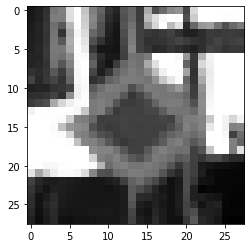

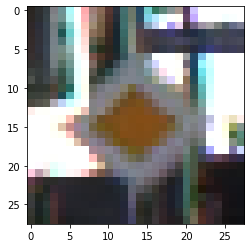

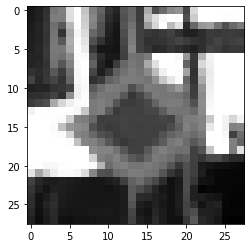

In [12]:

i = 220
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

In [13]:
x_train_gray_norm.shape

(39209, 28, 28, 1)

In [0]:
from keras.layers import AveragePooling2D,Dropout

In [0]:
model = models.Sequential()

model.add(Conv2D(10,(13,11), activation="relu",use_bias=True,input_shape=(28,28,1),kernel_initializer="lecun_uniform"))
model.add(Conv2D(20,(11,5), activation="relu",use_bias=False,kernel_initializer="lecun_uniform"))
model.add(Flatten()) 
model.add(Dense(350, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation ='softplus',kernel_initializer="he_normal"))
  
# training the model 







In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [52]:
model.fit(x_train_gray_norm, np.array(y_train),
          batch_size=256,
          epochs=30,
          verbose=1,
          validation_data=(x_validate_gray_norm,np.array(y_validate)))

Train on 39209 samples, validate on 43 samples
Epoch 1/30
39209/39209 [==============================] - 1s 21us/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 3.0476 - val_accuracy: 0.3953
Epoch 2/30
39209/39209 [==============================] - 1s 20us/step - loss: 0.0187 - accuracy: 0.9946 - val_loss: 3.0585 - val_accuracy: 0.3953
Epoch 3/30
39209/39209 [==============================] - 1s 20us/step - loss: 0.0169 - accuracy: 0.9951 - val_loss: 3.7823 - val_accuracy: 0.3721
Epoch 4/30
39209/39209 [==============================] - 1s 20us/step - loss: 0.0204 - accuracy: 0.9942 - val_loss: 3.8041 - val_accuracy: 0.3256
Epoch 5/30
39209/39209 [==============================] - 1s 20us/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 4.3253 - val_accuracy: 0.3256
Epoch 6/30
39209/39209 [==============================] - 1s 20us/step - loss: 0.0164 - accuracy: 0.9954 - val_loss: 3.9211 - val_accuracy: 0.3953
Epoch 7/30
39209/39209 [==============================] - 1s 20us/step 

In [0]:
pred= model.predict(x_test_gray_norm)

In [54]:
score=model.evaluate(x_test_gray_norm,np.array(y_test))
print(f"Accuracy : {score[1]}")

12630/12630 [==============================] - 1s 53us/step
Accuracy : 0.9240697026252747
